# Objetivo

Treinar, testar e validar um modelo de clusterização.

# Bibliotecas

In [1]:
import pandas as pd
from sklearn import cluster
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Lendo as tabelas

In [2]:
catalogo = "../data/02_processed/"

# Tabela de features
df_raw= pd.read_csv(f"{catalogo}tb_book_sellers.csv")

In [3]:
df_raw.info()
print(df_raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Columns: 214 entries, seller_id to recbruta_utilidades_domesticas_prop
dtypes: float64(141), int64(71), object(2)
memory usage: 40.1+ MB
(24547, 214)


In [4]:
df_raw.head()

,seller_id,data,qtd_agro_industria_e_comercio,qtd_alimentos,qtd_alimentos_bebidas,qtd_artes_e_artesanato,qtd_artigos_de_festas,qtd_artigos_de_natal,qtd_audio,qtd_automotivo,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-11-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0015a82c2db000af6aaaf3ae2ecb0532,2017-12-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0015a82c2db000af6aaaf3ae2ecb0532,2018-01-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Treino

In [5]:
df_train = df_raw[df_raw['data'] == '2018-05-01']
print(f'Shape antes: {df_train.shape}')

features = [c for c in df_train.columns if c.startswith('recbruta_') and c.endswith('_prop')]

cols = ['data', 'seller_id'] + features

df_train = df_train[cols]

print(f'Shape depois: {df_train.shape}')

Shape antes: (1441, 214)
Shape depois: (1441, 72)


In [6]:
df_train.head()

,data,seller_id,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
18,2018-05-01,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,2018-05-01,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2018-05-01,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,2018-05-01,00720abe85ba0859807595bbf045a33b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65,2018-05-01,00d8b143d12632bad99c0ad66ad52825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Kmeans

In [7]:
# Treino do modelo usando Agglomerative Clustering
model = cluster.KMeans(n_clusters=10)
model.fit(df_train[features]) # fit: ajuste do modelo a partir das features

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [8]:
df = df_train[features].copy()
df['cluster_id'] = model.labels_
df_train['cluster_id'] = model.labels_

df_train[['seller_id', 'cluster_id']]

,seller_id,cluster_id
18,001cca7ae9ae17fb1caed9dfb1094831,4
31,002100f778ceb8431b7a1020ff7ab48f,8
49,004c9cd9d87a3c30c522c48c4fc07416,9
55,00720abe85ba0859807595bbf045a33b,1
65,00d8b143d12632bad99c0ad66ad52825,9
...,...,...
24479,ffad1e7127fb622cb64a900751590acd,8
24487,ffc470761de7d0232558ba5e786e57b7,4
24507,ffdd9f82b9a447f6f8d4b91554cc7dd3,1
24521,ffeee66ac5d5a62fe688b9d26f83f534,4


In [9]:
df_train['cluster_id'].value_counts()

cluster_id
9    634
2    142
0    138
1    110
4     87
3     85
6     83
8     82
5     48
7     32
Name: count, dtype: int64

In [10]:
# Trasnforma as features de proporção em lista

df_cluster_mean = (
    df
    .groupby('cluster_id')
    .agg({col: 'mean' for col in features})
)

df_cluster_mean

,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,recbruta_bebes_prop,recbruta_bebidas_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.001258,0.000000,0.000000,0.000000,0.000000,0.000000,0.002733,0.003543,0.000000,...,0.003069,0.000000,0.0,0.002479,0.0,0.000000,0.000000,0.000014,0.000000,0.002083
1,0.001312,0.000000,0.000000,0.000410,0.000000,0.000000,0.000040,0.000000,0.004720,0.001128,...,0.001554,0.000000,0.0,0.001078,0.0,0.005610,0.000000,0.000065,0.000000,0.859902
2,0.000000,0.000480,0.001375,0.000995,0.000000,0.000000,0.000753,0.007390,0.003617,0.001841,...,0.003215,0.000408,0.0,0.001799,0.0,0.000510,0.000000,0.001427,0.001558,0.006752
3,0.000000,0.000000,0.000000,0.000137,0.000000,0.001190,0.000000,0.958595,0.000594,0.004507,...,0.002036,0.000000,0.0,0.002538,0.0,0.000000,0.000000,0.005981,0.000000,0.001945
4,0.000000,0.003956,0.000000,0.002329,0.000000,0.000000,0.000000,0.006446,0.002580,0.000000,...,0.005041,0.000000,0.0,0.002106,0.0,0.002544,0.000000,0.000830,0.000000,0.031304
5,0.000000,0.000000,0.001846,0.000105,0.000000,0.000000,0.000000,0.002979,0.874664,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000733,0.000000,0.000000,0.000521,0.000000,0.000000,0.000491,0.002252,0.000149,0.000000,...,0.000200,0.000000,0.0,0.000184,0.0,0.000145,0.000274,0.010813,0.003046,0.000910
7,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.015144,0.006277,0.000000,0.000000,...,0.000000,0.000000,0.0,0.886538,0.0,0.000000,0.000000,0.000611,0.000000,0.013064
8,0.000000,0.000000,0.002857,0.003314,0.000000,0.000000,0.000000,0.005778,0.006545,0.000000,...,0.000000,0.000000,0.0,0.001500,0.0,0.000000,0.000000,0.000033,0.000000,0.028729


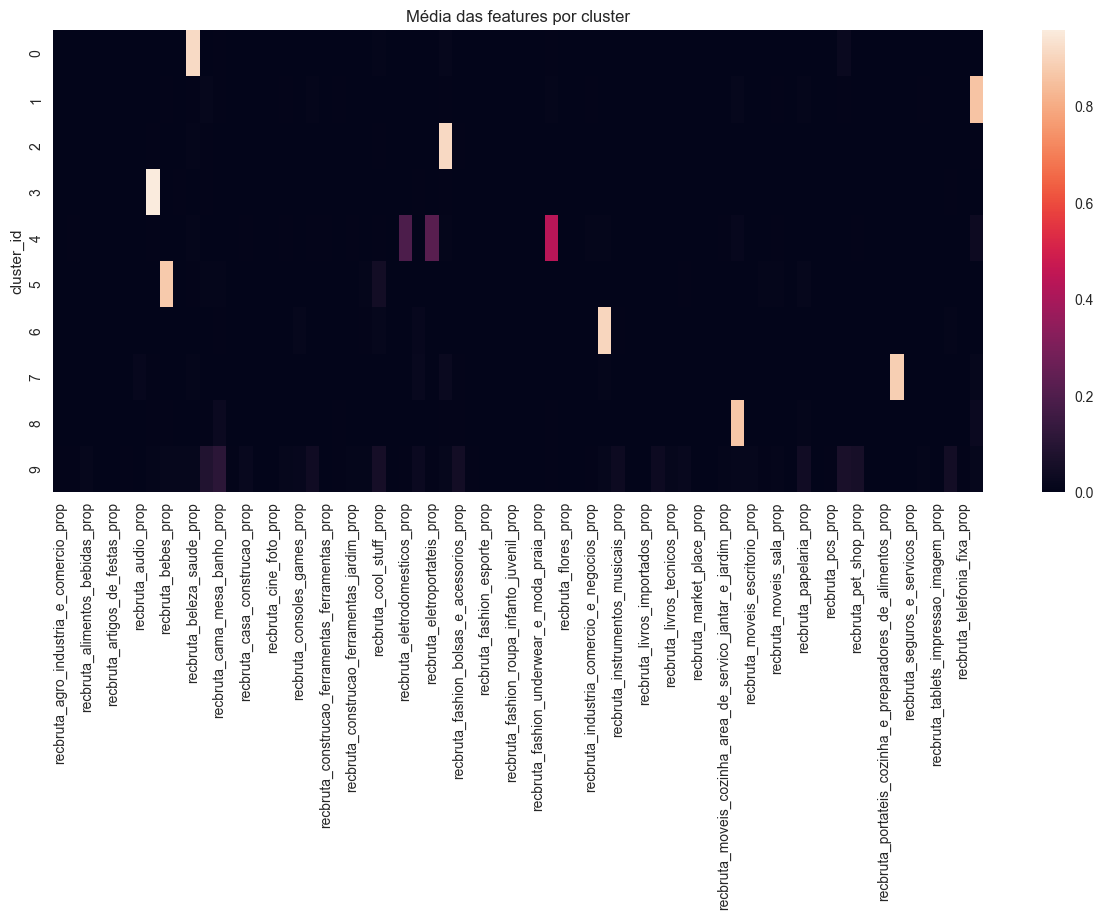

In [11]:
# Gráfico para mostrar as categorias com maior proporção média (força) dentro de cada cluster
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.title('Média das features por cluster')
plt.show()

## Árvore de Devisão

In [12]:
print(f"X: {type(df_train[features])}")
print(f"y: {type(df_train['cluster_id'])}")
print(f"Qtd Colunas: {len(df_train[features].columns)}")

X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>
Qtd Colunas: 70


In [13]:
# Como não temos clareza de quais categorias são mais importantes dentro de cada cluster, optamos por aplicar uma árvore de decisão
# Isso vai possibilitar entendermos quais features são mais importantes dentro de cada cluster

# Usando árvore de decisão para entender quais features são mais importantes na clusterização
X = df_train[features]
y = df_train['cluster_id']

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10325059, 0.07062281, 0.        ,
       0.14944658, 0.        , 0.00158781, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00173216,
       0.        , 0.02997875, 0.        , 0.03323335, 0.14699663,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07057981, 0.        , 0.        ,
       0.        , 0.10533152, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11196091, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05229832, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12298074])

In [15]:
feature_importance = pd.Series(clf.feature_importances_, index=features) # Pega a importancia das variáveis e ordena
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

recbruta_beleza_saude_prop                      0.149447
recbruta_esporte_lazer_prop                     0.146997
recbruta_utilidades_domesticas_prop             0.122981
recbruta_moveis_decoracao_prop                  0.111961
recbruta_informatica_acessorios_prop            0.105332
                                                  ...   
recbruta_fashion_roupa_feminina_prop            0.000000
recbruta_fashion_roupa_infanto_juvenil_prop     0.000000
recbruta_alimentos_prop                         0.000000
recbruta_fashion_underwear_e_moda_praia_prop    0.000000
recbruta_fashion_roupa_masculina_prop           0.000000
Length: 70, dtype: float64

In [16]:
# seleciona as 10 features mais importantes
top_features = feature_importance.index[:10].tolist()

df_cluster_mean = (
    df_train
    .groupby('cluster_id')
    .agg({col: 'mean' for col in top_features})
)

df_cluster_mean

,recbruta_beleza_saude_prop,recbruta_esporte_lazer_prop,recbruta_utilidades_domesticas_prop,recbruta_moveis_decoracao_prop,recbruta_informatica_acessorios_prop,recbruta_automotivo_prop,recbruta_bebes_prop,recbruta_ferramentas_jardim_prop,recbruta_relogios_presentes_prop,recbruta_eletroportateis_prop
cluster_id,,,,,,,,,,
0,0.916832,0.013770,0.002083,0.001048,0.000000,0.002733,0.003543,0.004375,0.002479,0.000000
1,0.005736,0.007291,0.859902,0.014907,0.000654,0.000000,0.004720,0.009986,0.001078,0.003278
2,0.010612,0.911009,0.006752,0.000614,0.001450,0.007390,0.003617,0.003631,0.001799,0.000000
3,0.000404,0.004441,0.001945,0.000000,0.002573,0.958595,0.000594,0.001508,0.002538,0.000197
4,0.009987,0.007530,0.031304,0.015888,0.010306,0.006446,0.002580,0.434918,0.002106,0.217546
5,0.005275,0.000000,0.000000,0.000000,0.000000,0.002979,0.874664,0.001953,0.000000,0.000000
6,0.003319,0.002868,0.000910,0.003083,0.903766,0.002252,0.000149,0.000336,0.000184,0.000000
7,0.008045,0.023230,0.013064,0.000047,0.010207,0.006277,0.000000,0.000000,0.886538,0.000000
8,0.000000,0.005680,0.028729,0.867338,0.002652,0.005778,0.006545,0.004447,0.001500,0.000000


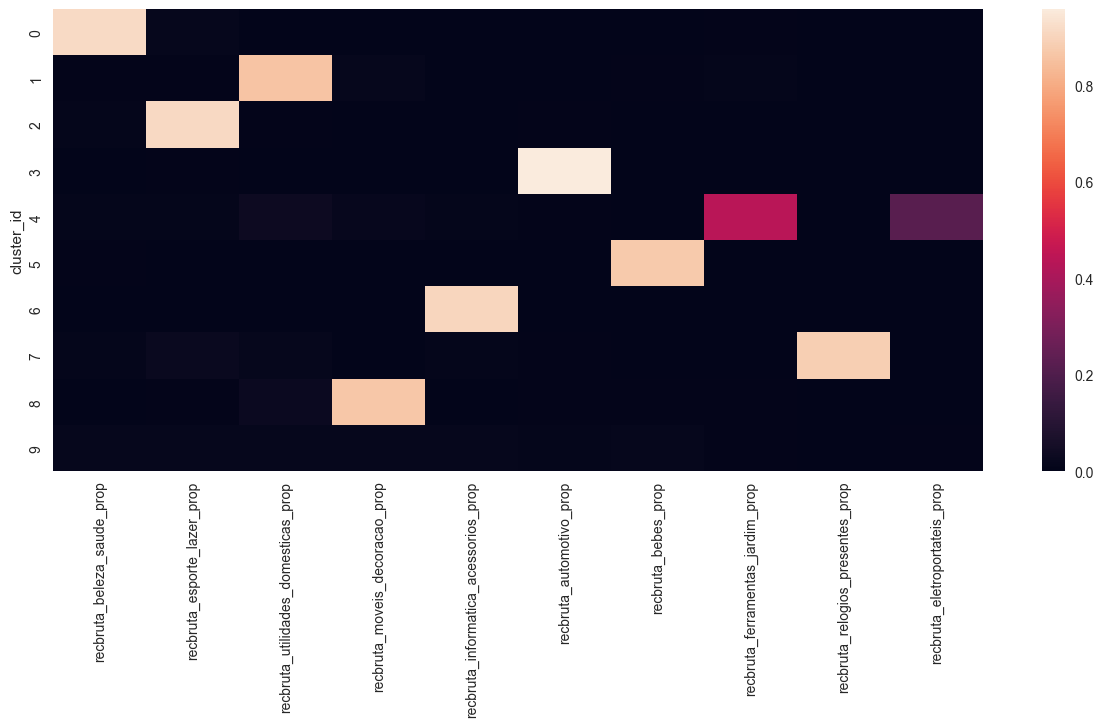

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.show()

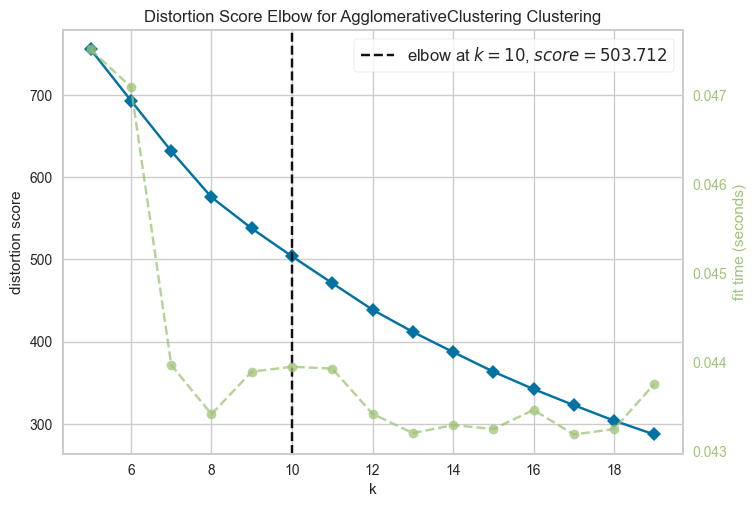

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20))
visualizer.fit(df_train[features])
visualizer.show()

# Conclusões

* Como temos muitas categorias nesta clusterização, o que dificulta o entendimento de quais categorias são mais representativas em cada cluster, ou seja, é difícil identificar qual a categoria predominante dentro de cada grupo. Por isso, optamos por rodar uma árvore de decisão para identificar quais features possuem maior importância dentro do dataset de treino.